# TP 3 : Strategies Paul Faverjon

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import math as m
import sympy as sp



## 1. Implementation of Brock-Hommes with 3 stategies

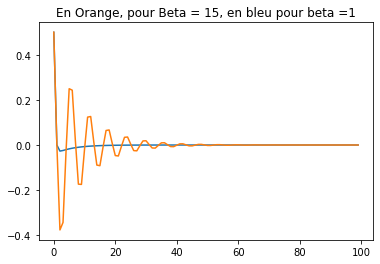

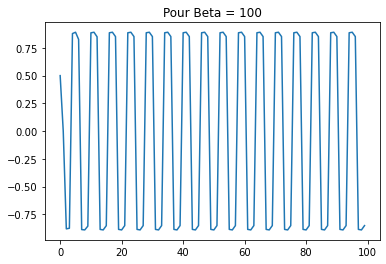

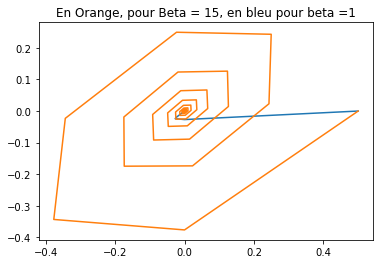

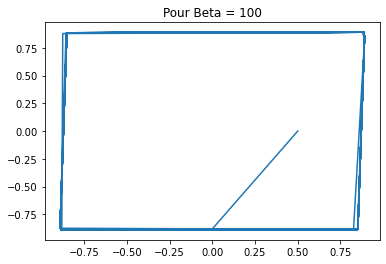

In [37]:



def modele(strategies, duree, sigma, beta, r, lambd): #strategies is a list of functions
    y = np.random.normal(size=duree, scale = sigma)
    H = len(strategies)
    U = np.full((duree, H), 0.5 )
    xt=np.full(duree,0.5)
    for t in range(1,duree): 
        b= np.exp(U[t-1,:]*beta)
        Zh = np.sum(b)
        somme = 0
        for h in range(0,H): 
            fun = strategies[h]
            somme += (np.exp(beta*U[t-1,h])/Zh)*fun(xt[t-1]+y[t-1])
            #print(somme,"est la somme pour h =",h) # computation of xt
        xt[t]=(somme)/(1+r)  
        for h in range(H):
            fun = strategies[h]
            U[t,h]= (1-lambd)*U[t-1,h]+lambd*(y[t]+xt[t]-(1+r)*xt[t-1]*fun(xt[t]+y[t]-(1-r)*xt[t-1]))
        #print(U[t,:])
    return xt


strat1 = [lambda x : 0 , lambda x : 0.9 , lambda x : -0.9]
a = modele( strat1 , 100, 1, 1, 0.01, 0.1)
b = modele( strat1 , 100, 1, 15, 0.01, 0.1)
c = modele( strat1 , 100, 1, 100, 0.01, 0.1)


plt.plot(a)
plt.plot(b)
plt.title("En Orange, pour Beta = 15, en bleu pour beta =1")
plt.show()
plt.title("Pour Beta = 100")
plt.plot(c)
plt.show()




plt.plot(a[:-1],a[1:])
plt.plot(b[:-1],b[1:])

plt.title("En Orange, pour Beta = 15, en bleu pour beta =1")
plt.show()
plt.plot(c[:-1],c[1:])
plt.title("Pour Beta = 100")
plt.show()










    




We observe that the more beta grows, the less stable the convergence toward 0 becomes. In our model, for beta=15, there is still a convergence with oscillations, but for Beta = 100, there is no stability ond there is a periodic oscillation of the price. This mau be du to the fact that as beta grows, the formula for n(h,t) does that only the agent with the biggets Utility function can influence the prices, he is the only one wose n(h,t)*strategy is not equal to almost 0.

## 2.Traditional strategies

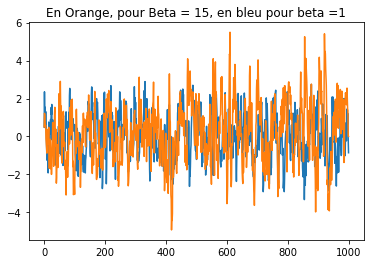

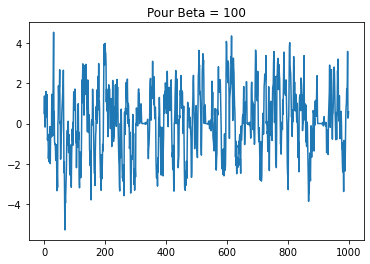

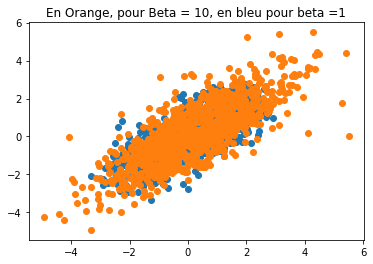

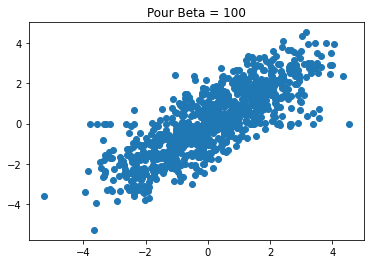

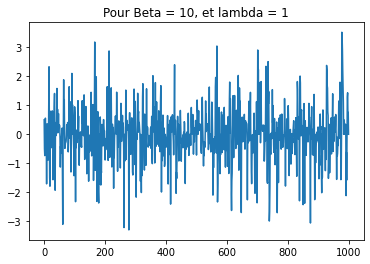

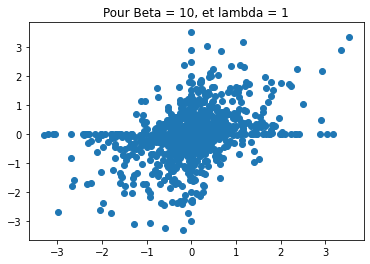

In [49]:



def modele(strategies, duree, sigma, beta, r, lambd): #strategies is a list of functions
    y = np.random.normal(size=duree, scale = sigma)
    H = len(strategies)
    U = np.full((duree, H), 0.5 )
    xt=np.full(duree,0.5)
    for t in range(1,duree): 
        b= np.exp(U[t-1,:]*beta)
        Zh = np.sum(b)
        somme = 0
        for h in range(0,H): 
            fun = strategies[h]
            somme += (np.exp(beta*U[t-1,h])/Zh)*fun(xt[t-1]+y[t-1])
            #print(somme,"est la somme pour h =",h) # computation of xt
        xt[t]=(somme)/(1+r)  
        for h in range(H):
            fun = strategies[h]
            U[t,h]= (1-lambd)*U[t-1,h]+lambd*(y[t]+xt[t]-(1+r)*xt[t-1]*fun(xt[t]+y[t]-(1-r)*xt[t-1]))
        #print(U[t,:])
    return xt

strat2 = [lambda x : 0 , lambda x : 0.9*x + 0.2 , lambda x : 0.9*x-0.2 , lambda x : (1+0.1)*x ]

a = modele( strat2 , 1000, 1, 1, 0.01, 0.1)
b = modele( strat2 , 1000, 1, 10, 0.01, 0.1)
c = modele( strat2 , 1000, 1, 100, 0.01, 0.1)
d = modele(strat2 , 1000, 1, 10, 0.01, 1)

plt.plot(a)
plt.plot(b)
plt.title("En Orange, pour Beta = 15, en bleu pour beta =1")
plt.show()
plt.title("Pour Beta = 100")
plt.plot(c)
plt.show()




plt.plot(a[:-1],a[1:],"o")
plt.plot(b[:-1],b[1:],"o")

plt.title("En Orange, pour Beta = 10, en bleu pour beta =1")
plt.show()
plt.plot(c[:-1],c[1:],"o")
plt.title("Pour Beta = 100")
plt.show()



plt.plot(d)
plt.title("Pour Beta = 10, et lambda = 1")
plt.show()
plt.plot(d[:-1],d[1:],"o")
plt.title("Pour Beta = 10, et lambda = 1")
plt.show()










    




The stability doesn't disappear, but the correlation between x(t-1) and x(t) is much less significant

## 3. Empirical strategies

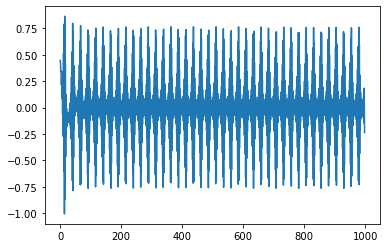

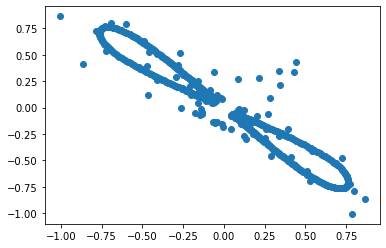

In [77]:
def modele(strategies, duree, sigma, beta, r, lambd): #strategies is a list of functions
    y = np.random.normal(size=duree, scale = sigma)
    H = len(strategies)
    U = np.full((duree, H), 0.5 )
    xt=[0.5 for i in range(5) ]
    for t in range(1,duree): 
        b= np.exp(U[t-1,:]*beta)
        Zh = np.sum(b)
        somme = 0
        for h in range(0,H): 
            fun = strategies[h]
            somme += (np.exp(beta*U[t-1,h])/Zh)*fun(xt)
            #print(somme,"est la somme pour h =",h) # computation of xt
        xt.append((somme)/(1+r))
        for h in range(H):
            fun = strategies[h]
            U[t,h]= (1-lambd)*U[t-1,h]+lambd*(y[t]+xt[t]-(1+r)*xt[t-1]*fun(xt))
        #print(U[t,:])
    return xt[5:], 



def ada(liste): 
    return 0.35*liste[-1] + 0.65*liste[-2]

def wtr(l): 
    return l[-2] + 0.4*(l[-2]-l[-3])

def str(l):
    return l[-2] +1.3*(l[-2]-l[-3])

def laa(l):
    av =0.2*sum(l[-5:])
    return 0.5*(av+l[-2]) + l[-2]-l[-3]

def aa(l): 
    return 0.5*l[-2] + l[-2]-l[-3]

strat = [ada, wtr, str,laa,aa]


e = modele( strat , 1000, 1, 10, 0.01, 0.2)
plt.plot(e)
plt.show()

plt.plot(e[:-1],e[1:],"o")
plt.show()

Here, when we increase beta, the oscillations are bigger, and when we increase lambda, the oscilllations begin to have a higher frequency, and for  lambda >= 0.8, we get an error very soon (150th iteration). Interestingly enough, xt = f(x(t-1)) draws a figure eight.
